<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Machine Learning Project Template</h1>
</div>

Just learning the concepts and theory is not sufficient to ace in machine learning. You need to implement the concepts and try to solve more practical problems.

In this notebook, you will learn how to implement machine learning. You will be able to kickstart your project using this template. 

### Content:
1. Load the Data
    - Import libraries
    - Load the datasets
<br> <br>  
  
2. Overview of the Data
    - Descriptive Statistics
    - Missing Values
<br><br>
3. Exploratory Data Analysis
    - Create list of columns by data type
    - Check the distribution of target class
    - Check the distribution of every feature
    - Check how differnt numerical features are realated to target class
<br><br>
4. Data Preparation
    - Data Cleaning
    - Feature Encoding
    - Split X & y
    - Feature Scaling
    - Train Test split
<br><br>
5. Model Building
    - Train Model
    - Model Prediction
    - Model Evaluation
<br><br>
7. Improve Model
    - Handle Class Imbalance
    - Hyperparameter Tuning
    - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well. 

In [1]:
# Input file name with path
input_file_name = 'https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv'

# Target class name
input_target_class = "Exited"

# Columns to be removed
input_drop_col = "CustomerId"

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Categorical columns
input_cat_columns = ['Surname', 'Geography', 'Gender', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical columns
input_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Encoding technique
input_encoding = 'LabelEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'

# Handle missing value
input_treat_missing_value = 'drop' # choose how to handle missing values from 'drop','inpute' and 'ignore'

# Machine learning algorithm
input_ml_algo = 'RandomForestClassifier' # choose the ML algorithm from 'LogisiticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier' and LGBMClassifier'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [2]:
%pip install xgboost

You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [8]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

# Random 5 rows of the dataset
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9847,9848,15815097,Root,603,France,Female,34,9,0.00,2,1,0,167916.35,0
7928,7929,15640789,Butler,711,France,Male,38,4,123345.85,1,1,0,141827.83,0
7015,7016,15683168,Frederickson,572,France,Female,30,6,0.00,1,0,1,175025.27,0
1638,1639,15571550,Dore,699,France,Male,39,9,0.00,1,1,0,80963.92,0
6797,6798,15811978,Trevisani,693,Germany,Male,46,2,104763.41,1,1,1,62368.33,0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [9]:
# Dimension of the data
df.shape

(10000, 14)

In [10]:
# Summary of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [13]:
# Missing values for every column
df.isna().sum().sum()

0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [ ]:
# Remove extra columns
col_remove = input_drop_col
df = df.drop(col_remove, axis = 1)

In [16]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
Categorical Columns :  ['Surname', 'Geography', 'Gender']
Numerical Columns :  ['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

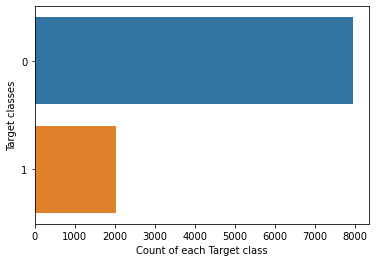

In [17]:
# Check distribution of target class
sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.3. Check the distribution of every feature

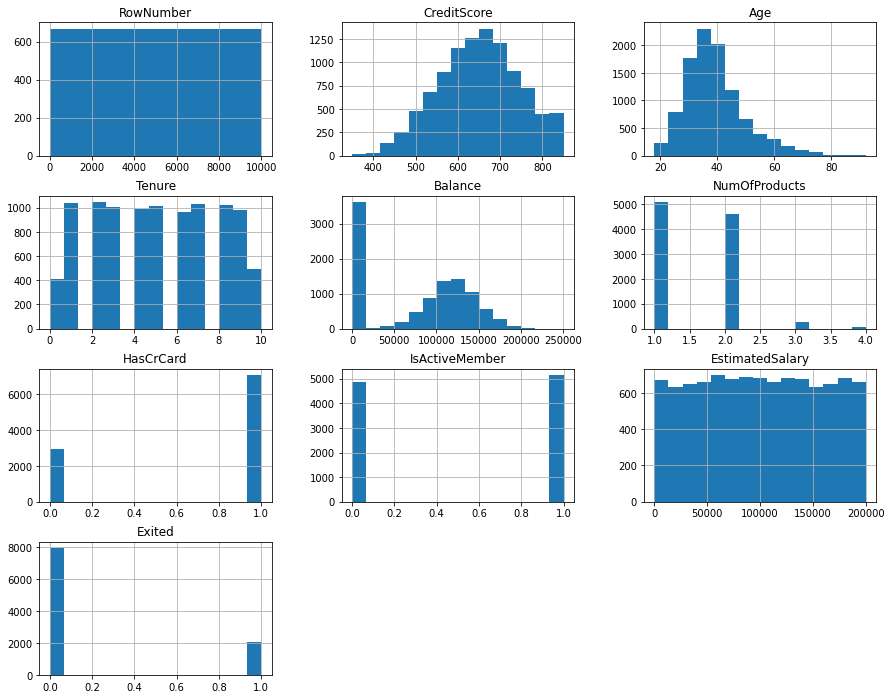

In [18]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [22]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

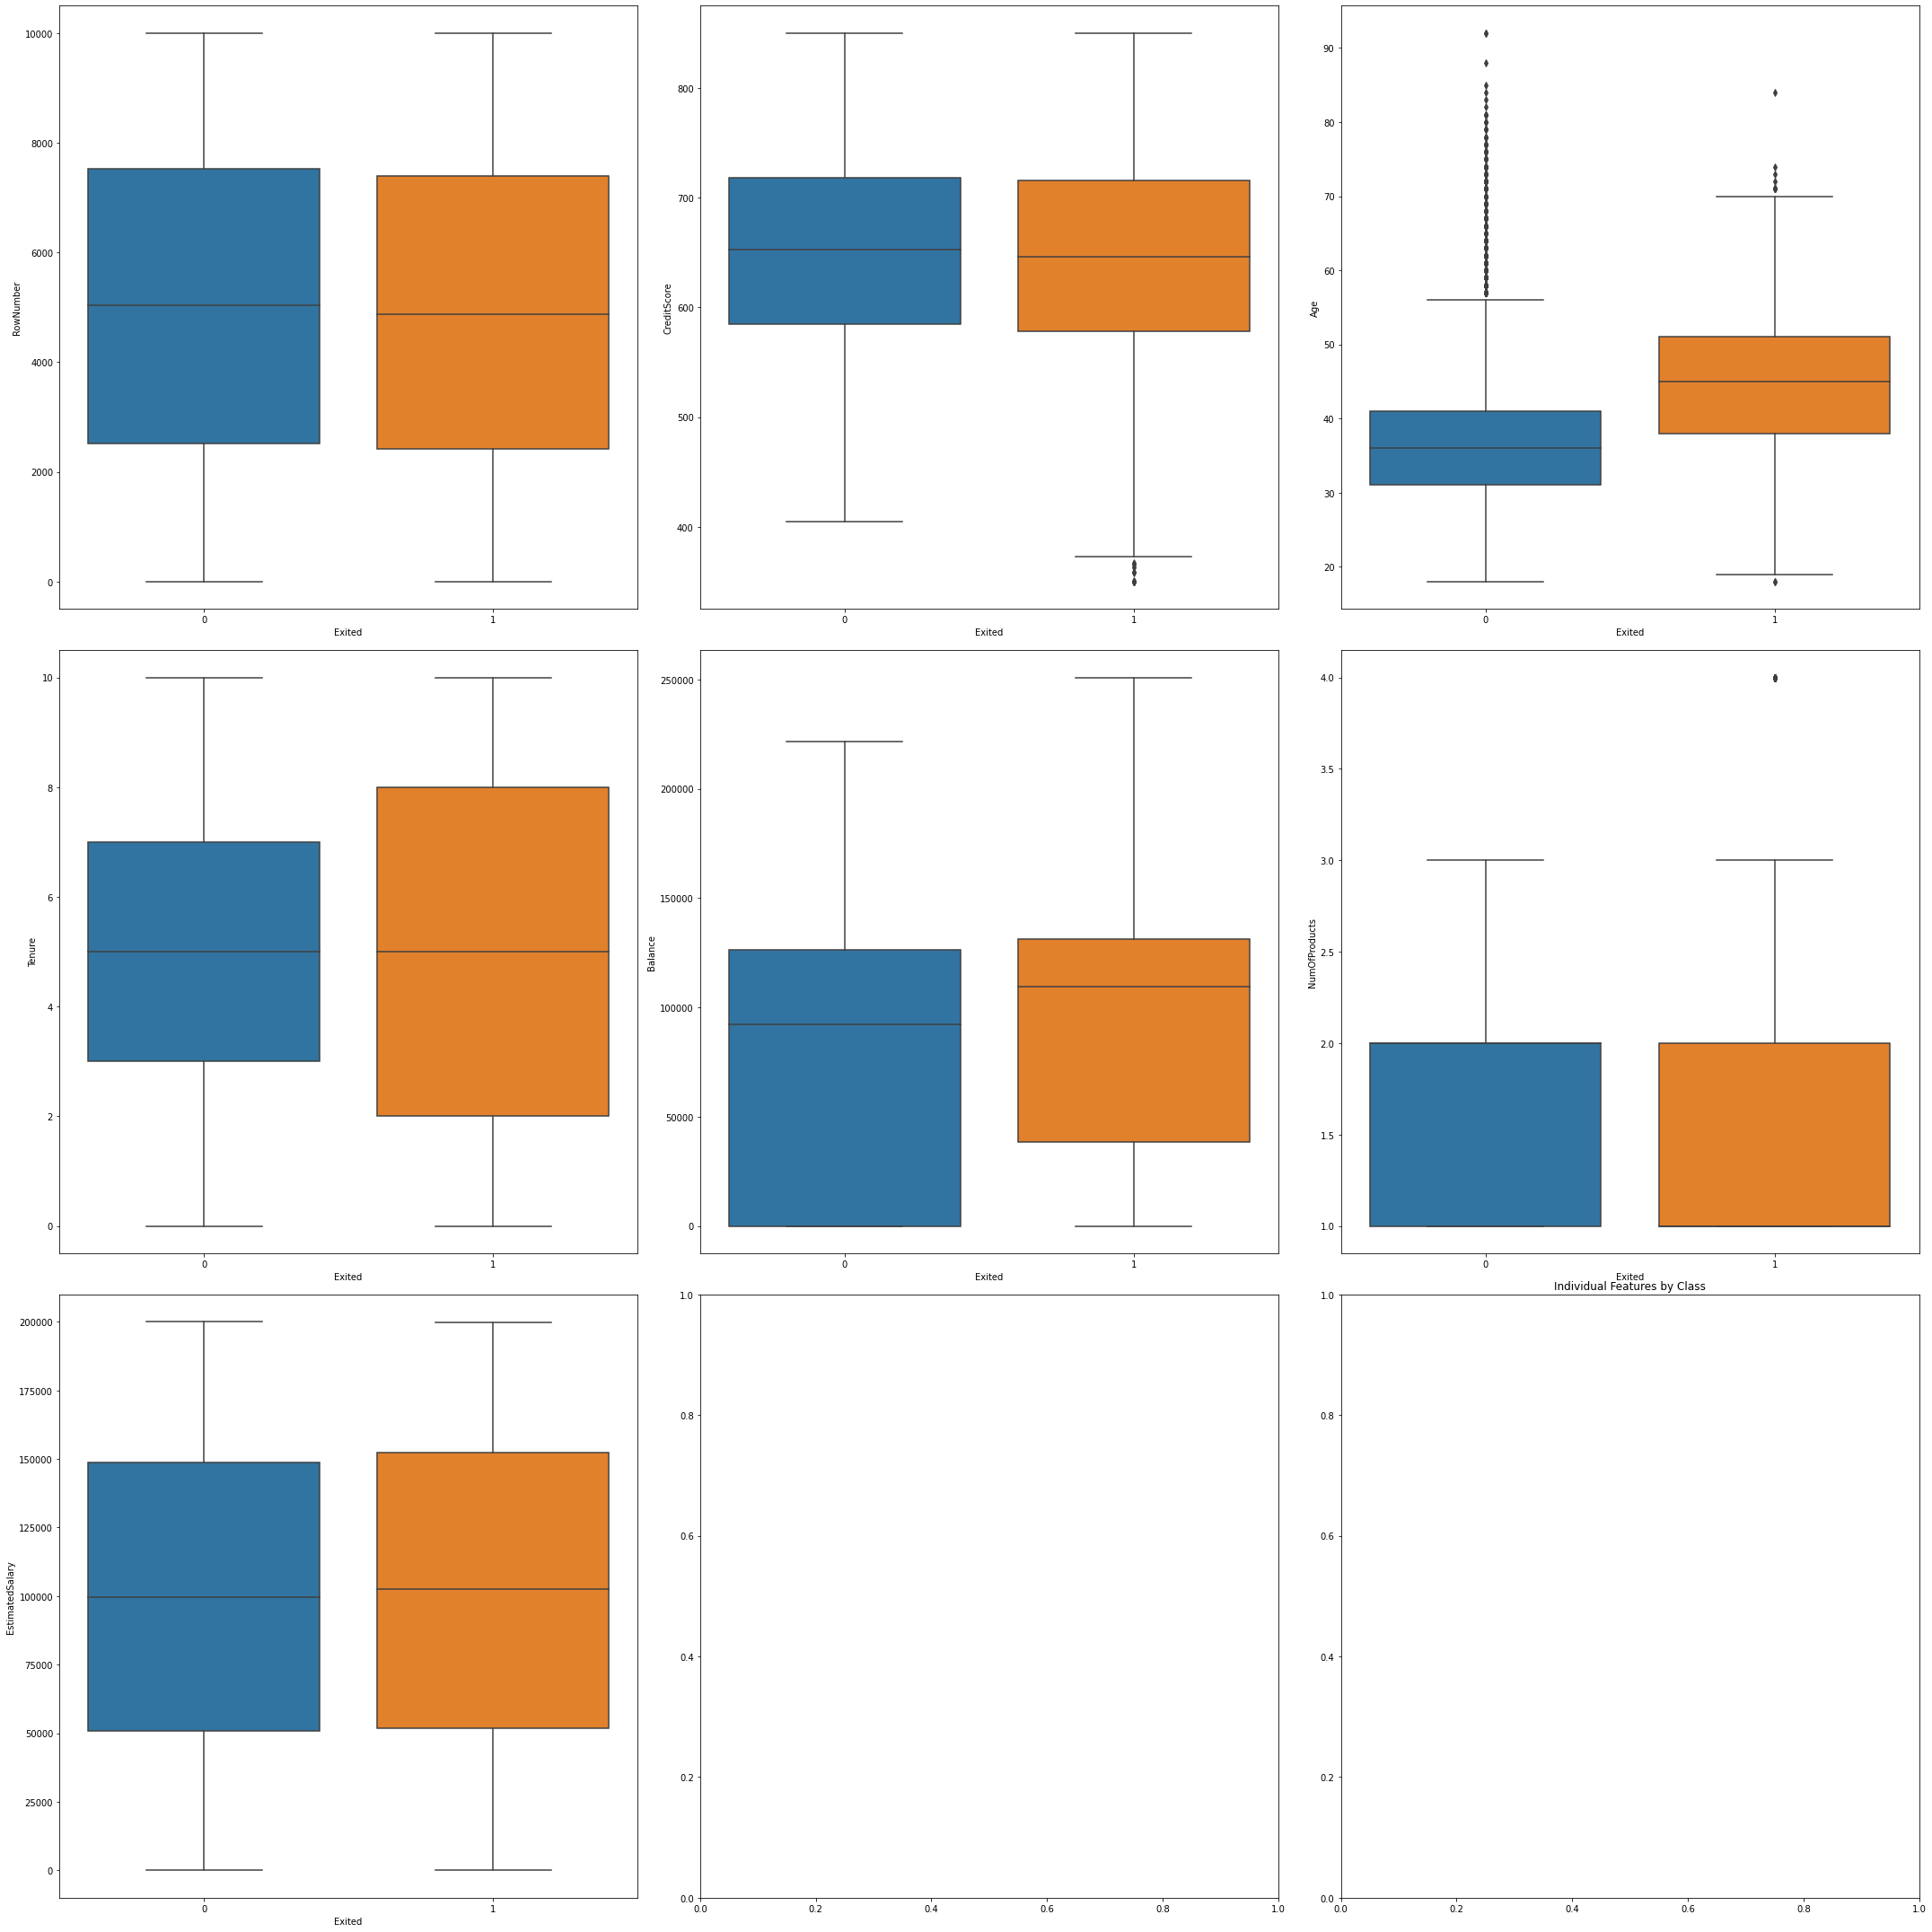

In [23]:
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df[input_target_class], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [24]:
# Select how you wish to treat missing values according to the input provided
if input_treat_missing_value == 'drop':
    
    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute': 
    
    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

(10000, 13)


In [25]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [26]:
categorical_columns.remove(input_target_class)
categorical_columns

['Surname', 'Geography', 'HasCrCard', 'IsActiveMember', 'Gender']

In [27]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))
    
elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)
    
elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df.groupby(variable).size()/len(df)    
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 

In [30]:
df.sample(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2727,2728,2429,754,1,1,57,2,101134.87,2,1,1,70954.41,0
9256,9257,135,765,1,1,37,7,102708.77,1,1,0,9087.81,0
4321,4322,1234,651,0,1,34,4,91562.99,1,1,1,123954.15,0
2107,2108,1674,646,2,0,42,3,99836.47,1,0,1,22909.56,0
76,77,1237,664,0,1,55,8,0.00,2,1,1,139161.64,0


In [33]:
# get the number of men/womens according to Gender column
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

### 4.3. Split X and y

Split the X and y dataset

In [31]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [ ]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [ ]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.464693,-0.325963,-0.901909,-1.095405,0.293274,-1.041002,-1.227079,-0.911007,0.645717,0.970673,0.022297
1,-0.391308,-0.439829,1.515697,-1.095405,0.197939,-1.386802,0.116356,-0.911007,-1.548666,0.970673,0.216975
2,0.627793,-1.537080,-0.901909,-1.095405,0.293274,1.033796,1.332274,2.526711,0.645717,-1.030213,0.241132
3,-1.441185,0.502150,-0.901909,-1.095405,0.007269,-1.386802,-1.227079,0.807852,-1.548666,-1.030213,-0.108528
4,0.370947,2.065215,1.515697,-1.095405,0.388609,-1.041002,0.784852,-0.911007,0.645717,0.970673,-0.364926


### 4.5 Train - Test Split

Split the dataset in training and test set

In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [ ]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif input_ml_algo == 'XGBClassifier':
    model = XGBClassifier()
elif input_ml_algo == 'LGBMClassifier':
    model = LGBMClassifier()

In [ ]:
# Training the model:
model.fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [ ]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [0 0 1 ... 0 0 0]
Y probability predicted :  [0.01, 0.0, 0.86, 0.1, 0.15]


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [ ]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 


 Accuracy Score : 
  0.8530884808013356

 AUC Score : 
 0.8415401959228193

 Confusion Matrix : 
  [[2283   91]
 [ 349  272]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2374
           1       0.75      0.44      0.55       621

    accuracy                           0.85      2995
   macro avg       0.81      0.70      0.73      2995
weighted avg       0.84      0.85      0.84      2995


 ROC curve : 



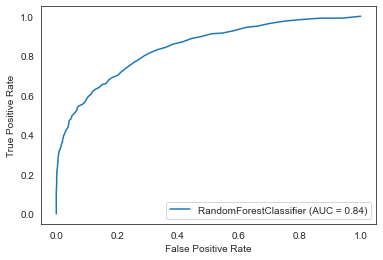

In [ ]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [ ]:
# Over sample the minority class 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    7946
0    7946
Name: Exited, dtype: int64

In [ ]:
# Define the function to build model on balanced dataset
def classification_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model


 Accuracy Score : 
  0.9507130872483222

 AUC Score : 
 0.9895363768357681

 Confusion Matrix : 
  [[2208  174]
 [  61 2325]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2382
           1       0.93      0.97      0.95      2386

    accuracy                           0.95      4768
   macro avg       0.95      0.95      0.95      4768
weighted avg       0.95      0.95      0.95      4768


 ROC curve : 



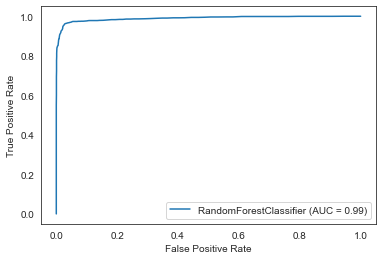

In [ ]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [ ]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [ ]:
# Select the model and parameter grid according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model       = DecisionTreeClassifier()
    param_grid  = param_grid_decision_tree
elif input_ml_algo == 'RandomForestClassifier':
    model       = RandomForestClassifier()
    param_grid  = param_grid_random_forest
elif input_ml_algo == 'XGBClassifier':
    model       = XGBClassifier()
    param_grid  = param_grid_xgb
elif input_ml_algo == 'LGBMClassifier':
    model       = LGBMClassifier()
    param_grid  = param_grid_lgbm

In [ ]:
 # Run grid search 
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   35.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 1 0 ... 0 0 1]
Y probability predicted :  [0.5380041992636907, 0.5247293610000635, 0.09666666666666666, 0.24166666666666667, 0.6373419723551302]



 Accuracy Score : 
  0.947986577181208

 AUC Score : 
 0.990142346587954

 Confusion Matrix : 
  [[2195  187]
 [  61 2325]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      2382
           1       0.93      0.97      0.95      2386

    accuracy                           0.95      4768
   macro avg       0.95      0.95      0.95      4768
weighted avg       0.95      0.95      0.95      4768


 ROC curve : 



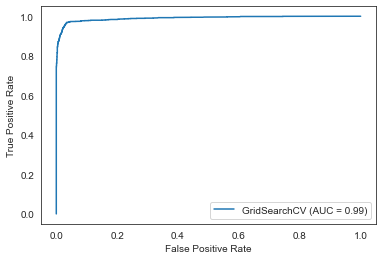

In [ ]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

In [ ]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>